In [1]:
import sys
print(sys.executable)

D:\anaconda3\envs\d2l\python.exe


# 基本符号

样本量 $N$或$m$

特征数量 $d$ 或写作 in_features

参数 $\omega$和$b$ 或统一为 $\theta$

学习率 $\alpha$ 或写作``lr``

批次大小 $B$或$b$

损失函数 $L(\hat{y},y)$

成本函数（优化目标） $J(\theta)$

模型函数 $h(\theta)$

激活函数 $\sigma(z)$专指sigmoid函数，$\phi(z)$或者$g(z)$指一般的激活函数

在神经网络中，中间层预激活值$z$，激活函数后的输出$a$，最后的输出为$\hat{y}$

神经网络层数$L$，特定层的索引$l$，第$l$层参数$W^{[l]},b^{[l]}$

X形状: (N, in_features)，相当于正常表格的形式

W形状： (out_features, in_features) 排列方式: 每一行是同一个神经元的所有权重。

$$Z = X  W^T + b$$

也有转置过来的情形
$$Z = X  W + b$$

``torch.matmul()``，并且一般会reshape一下确保维度匹配

# 基本数学知识

## 矩阵求导
### 标量函数（输出是标量）
标量函数$\mathbb{R}^{m*n}\rightarrow \mathbb{R}$

梯度矩阵和梯度向量都是原来定义域的维度

梯度向量的转置叫偏导向量，梯度矩阵的转置叫Jacobi矩阵

<mark>机器学习中，$\frac{\partial{y}}{ \partial\mathbf{x}}$是偏导向量，也即行向量；$\frac{\partial{y}}{\partial{X}}$是Jacobi矩阵</mark>
### 向量函数（输出是向量）
向量函数$\mathbb{R}^{n}\rightarrow \mathbb{R}^m$

f对应m个标量函数的纵排

<mark>梯度矩阵是n*m的，同一列是一个标量函数的梯度矩阵，也即输入空间乘输出空间</mark>，梯度矩阵的转置是Jacobi

<mark>在机器学习中，求$\frac{\partial \mathbf{y}}{\partial{x}}$是求Jacobi，也即列向量</mark>

<mark>在机器学习中，求$\frac{\partial \mathbf{y}}{\partial \mathbf{x}}$，$\frac{\partial \mathbf{y}}{\partial \mathbf{X}}$是求Jacobi矩阵</mark>
### 矩阵函数（输出是矩阵）
向量函数$\mathbb{R}^{m\times n}\rightarrow \mathbb{R}^{p \times q}$

f对应$p\times q$个标量函数

<mark>梯度矩阵是$m\cdot n\times p\cdot q$，同一列是一个标量函数的梯度矩阵的展平，按照先行后列展平；不同列之间按照标量函数先行后列展平的顺序，也即输入空间乘输出空间</mark>

<mark>在机器学习中，最终以高位张量呈现，Y的维度不变，X的维度为原来的逆置</mark>

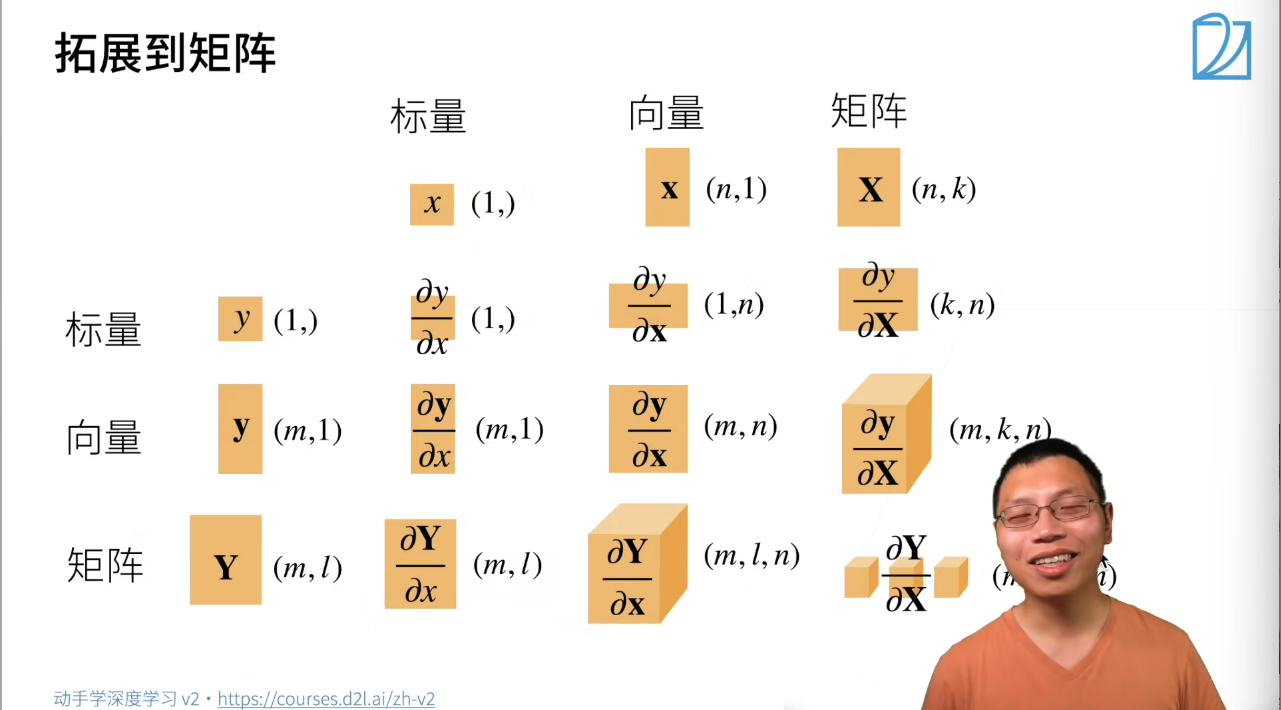

被挡住的是(m,l,k,n)

求导的实例，常用的是**左乘左不变**，而不是左乘左转置
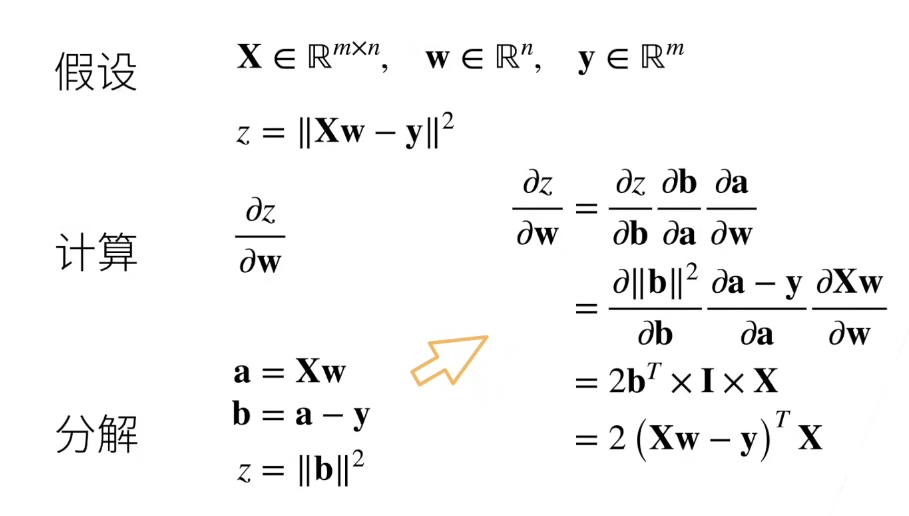

### 自动求导
基于链式法则，可以从外向内计算（正向累积），也可以反向累积

In [1]:
import torch
x=torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [33]:
import torch

n = 5
# 创建一个 n x 1 的列向量 x
x = torch.randn(n, 1, requires_grad=True)

# 定义一个标量 y，例如 y = x 的所有元素之和
y = x.sum()

# 反向传播
y.backward()

# 验证
print("--- 实验1: 标量y 对 列向量x ---")
print(f"x 的形状: {x.shape}")
print(f"x.grad 的形状: {x.grad.shape}")
assert x.grad.shape == x.shape
print("✅ 验证成功: PyTorch 遵循分母布局，梯度形状与变量形状一致。")

--- 实验1: 标量y 对 列向量x ---
x 的形状: torch.Size([5, 1])
x.grad 的形状: torch.Size([5, 1])
✅ 验证成功: PyTorch 遵循分母布局，梯度形状与变量形状一致。


In [34]:
m, n = 3, 4
# 创建一个 m x n 的矩阵 X
X = torch.randn(m, n, requires_grad=True)

# 定义一个标量 y
y = X.sum()

# 反向传播
y.backward()

# 验证
print("\n--- 实验2: 标量y 对 矩阵X ---")
print(f"X 的形状: {X.shape}")
print(f"X.grad 的形状: {X.grad.shape}")
assert X.grad.shape == X.shape
print("✅ 验证成功: PyTorch 遵循分母布局，梯度形状与变量形状一致。")
print("(注意: 图中分母布局的 'm x m' 可能是笔误，正确的行为是与原矩阵形状相同)")


--- 实验2: 标量y 对 矩阵X ---
X 的形状: torch.Size([3, 4])
X.grad 的形状: torch.Size([3, 4])
✅ 验证成功: PyTorch 遵循分母布局，梯度形状与变量形状一致。
(注意: 图中分母布局的 'm x m' 可能是笔误，正确的行为是与原矩阵形状相同)


In [35]:
from torch.autograd.functional import jacobian

m, n = 3, 5
# 创建权重和输入
W = torch.randn(m, n) # 权重 W
x = torch.randn(n, 1, requires_grad=True) # 输入列向量 x

# 定义一个函数，计算输出列向量 y
def func(input_x):
    return W @ input_x # y = Wx

# --- 验证A: PyTorch 的 .backward() 行为 (VJP) ---
y_vjp = func(x)
# 我们必须提供一个 grad_outputs，形状和 y 一样
grad_outputs = torch.ones_like(y_vjp)
y_vjp.backward(gradient=grad_outputs)

print("\n--- 实验3: 列向量y 对 列向量x ---")
print("--- 验证A: .backward() (VJP) 的行为 ---")
print(f"x 的形状: {x.shape}")
print(f"x.grad 的形状: {x.grad.shape}")
assert x.grad.shape == x.shape
print("✅ .backward() 的结果遵循分母布局，形状与 x 一致。它计算的是VJP，不是完整的雅可比。")


# --- 验证B: 使用专用工具计算完整的雅可比矩阵 ---
# 计算雅可比矩阵 J = dy/dx
J = jacobian(func, x)

print("\n--- 验证B: jacobian() 的行为 ---")
# J 的原始形状是 (m, 1, n, 1)，是输出形状和输入形状的拼接
print(f"jacobian() 计算出的原始形状: {J.shape}")
# 我们把它压缩成一个二维矩阵
J_squeezed = J.squeeze()
print(f"压缩后的雅可比矩阵形状: {J_squeezed.shape}")
assert J_squeezed.shape == (m, n)
print(f"✅ jacobian() 计算出的结果是 ({m}, {n}) 矩阵，这与图中的 '分子布局' (雅可比矩阵) 完全一致！")


--- 实验3: 列向量y 对 列向量x ---
--- 验证A: .backward() (VJP) 的行为 ---
x 的形状: torch.Size([5, 1])
x.grad 的形状: torch.Size([5, 1])
✅ .backward() 的结果遵循分母布局，形状与 x 一致。它计算的是VJP，不是完整的雅可比。

--- 验证B: jacobian() 的行为 ---
jacobian() 计算出的原始形状: torch.Size([3, 1, 5, 1])
压缩后的雅可比矩阵形状: torch.Size([3, 5])
✅ jacobian() 计算出的结果是 (3, 5) 矩阵，这与图中的 '分子布局' (雅可比矩阵) 完全一致！


In [3]:
x.requires_grad_(True)
#可以通过x.grad读取导数

tensor([0., 1., 2., 3.], requires_grad=True)

In [4]:
y=2*torch.dot(x,x)
y.backward()
x.grad  #应该是4倍的x

tensor([ 0.,  4.,  8., 12.])

pytorch的梯度会累积

In [9]:
#x.grad.zero_()
y=x.sum()
y.backward()
x.grad  #应该是全1

tensor([ 5.,  9., 13., 17.])

#### 计算图
对于每一个requires_grad的tensor，是图的节点，图的边是连接两节点的运算

当计算一个标量的梯度backward时，反向传播，依次计算图上节点的梯度，直到遇到叶子节点

``detach() ``的作用: 它创建了一个新的 Tensor u，这个 u 与 y 共享相同的底层数据存储，但是 u 脱离了当前的计算图，它的requires_grad参数为False

In [10]:
x.grad.zero_()
y=x*x
u=y.detach()
z=u*x

z.sum().backward()
x.grad==u

tensor([True, True, True, True])

# 线性回归

In [10]:
%matplotlib inline
import random
from d2l import torch as d2l


In [11]:
def synthetic_data(w,b,num):
    '''
    X是数据集，按行排列
    y是标注，按行排列，是列向量
    w是参数，列向量
    b是偏置，一个数，调用广播
    '''
    X=torch.normal(0,1,(num,len(w)))
    y=torch.matmul(X,w)+b
    y+=torch.normal(0,0.01,y.shape)#加入随机噪音
    return X,y.reshape((-1,1))

true_w=torch.tensor([2,-3.4])
true_b=4.2
features,labels=synthetic_data(true_w,true_b,1000)
features,labels

(tensor([[-0.7741,  0.0590],
         [-0.3466,  1.3366],
         [ 0.7719,  0.5259],
         ...,
         [-1.0690,  1.2806],
         [-1.6192, -0.6384],
         [-0.3498,  1.5756]]),
 tensor([[ 2.4487e+00],
         [-1.0154e+00],
         [ 3.9635e+00],
         [ 9.8660e+00],
         [ 9.3591e+00],
         [ 3.4894e-01],
         [ 6.6062e-01],
         [ 1.2154e+00],
         [ 8.3567e+00],
         [ 5.8156e+00],
         [ 7.9532e+00],
         [ 7.6562e+00],
         [ 6.3105e+00],
         [ 9.8808e-01],
         [ 8.9898e+00],
         [ 9.6242e-01],
         [ 8.3168e+00],
         [ 8.6091e+00],
         [ 6.0622e+00],
         [ 5.2744e+00],
         [-1.8513e+00],
         [ 5.3149e+00],
         [ 3.1973e+00],
         [-4.4727e+00],
         [ 5.1329e+00],
         [ 8.6359e+00],
         [ 6.3593e+00],
         [ 1.0587e+01],
         [ 7.0982e+00],
         [ 8.8239e+00],
         [ 7.4028e+00],
         [ 6.5513e+00],
         [-2.8032e+00],
         [ 2.0107e

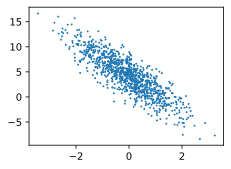

In [12]:
d2l.set_figsize()
d2l.plt.scatter(features[:,-1].detach().numpy(), 
                labels.detach().numpy(),1)

In [13]:
#第一步 定义数据加载器
def data_iter(batch_size,features,labels):#定义一个生成器，返回特征和标记的小批量
    num_examples=len(features)
    index=list(range(0,num_examples))
    random.shuffle(index)#打乱下表顺序
    for i in range(0,num_examples,batch_size):
        batch_index=torch.tensor(index[i:min(i+batch_size,num_examples)])
        yield features[batch_index],labels[batch_index]

batch_size=10
#打印一个批次
for X,y in data_iter(batch_size,features,labels):
    print(X,'\n',y)
    break


tensor([[ 1.0867,  0.2433],
        [ 2.0791,  0.8698],
        [ 0.5105, -2.0418],
        [ 0.0509, -0.1133],
        [ 0.4632,  1.1254],
        [ 1.3033, -0.3431],
        [ 0.1248,  0.3405],
        [ 0.3147,  1.4875],
        [ 0.0829,  0.6720],
        [-0.5648, -0.8265]]) 
 tensor([[ 5.5665],
        [ 5.3923],
        [12.1654],
        [ 4.6835],
        [ 1.2847],
        [ 7.9695],
        [ 3.3043],
        [-0.2363],
        [ 2.0826],
        [ 5.8773]])


In [14]:
#第二步 初始化模型参数
w=torch.normal(0,0.01,size=(2,1),requires_grad=True)#w是列向量
b=torch.zeros(1,requires_grad=True)
w,b

(tensor([[-0.0089],
         [-0.0060]], requires_grad=True),
 tensor([0.], requires_grad=True))

In [15]:
#第三步 构建前向传播的函数
def linreg(X,w,b):
    return torch.matmul(X,w)+b

In [16]:
#第四步 构建损失函数
def loss(y_hat,y):
    return (y_hat-y.reshape(y_hat.shape))**2/2

In [17]:
#第五步 构建优化器
def sgd(prama,lr,batch_size):
    with torch.no_grad():
        for pra in prama:
            pra-=lr*pra.grad/batch_size#这里要除以batch_size本质是因为J(\theta)会对Loss求平均，我定义的loss只是Loss而不是J
            pra.grad.zero_()

In [18]:
#第六步 对每一轮训练，具体而言，加载数据，前向传播，计算损失，计算梯度，调用优化器，评估
lr=0.03
num_epoch=7
net=linreg
now_loss=loss
for epoch in range(num_epoch):
    for X,y in data_iter(batch_size,features,labels):
        l=now_loss(net(X,w,b),y)
        l.sum().backward()#这里求出来的梯度是一个批次的总梯度
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_1=loss(net(features,w,b),labels)
        print(f'{epoch+1},loss {float(train_1.mean()):f}')

1,loss 0.037930
2,loss 0.000152
3,loss 0.000052
4,loss 0.000052
5,loss 0.000052
6,loss 0.000052
7,loss 0.000052


## 快速实现

数据部分

先构建TensorDataset，再构建DataLoader

In [20]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w=torch.tensor([2,-3.4])
true_b=4.2
features,labels =d2l.synthetic_data(true_w,true_b,1000)#数据合成的函数

def load_array(data_array,batch_size,is_train=True):
    dataset=data.TensorDataset(*data_array)
    return data.DataLoader(dataset,batch_size,shuffle=is_train)

batch_size=10
data_iter=load_array((features,labels),10)

参数部分

线性层的参数只有weight 和 bias，可以通过``parameters()``获取，返回一个“随用随取”的迭代器。当你 for 循环遍历它时，它一次只给你一个参数

每一个参数有成员.data和.grad和.requires_grad

In [26]:
from torch import nn
net=nn.Sequential(nn.Linear(2,1))#Seqential就是一层一层列表的容器
#初始化末次模型参数
net[0].weight.data.normal_(0,0.01)
net[0].bias.data.fill_(0)

loss=nn.MSELoss()#loss 函数会计算它们之间的均方误差，并且因为默认是 reduction='mean'，它会计算出这个批次所有样本损失的平均值。
trainer=torch.optim.SGD(net.parameters(),lr=0.03)#参数，学习率

num_epochs=7
for epoch in range(num_epochs):
    for X,y in data_iter:
        l=loss(net(X),y)
        trainer.zero_grad()
        l.backward()
        trainer.step()#对于每一个参数 pra，pra.data = pra.data - lr * pra.grad，这里就不用除以batch_size
    l=loss(net(features),labels)#这里没有区分训练级和测试级
    print(f"epoch{epoch+1},loss {l:f}")

epoch1,loss 0.000187
epoch2,loss 0.000111
epoch3,loss 0.000110
epoch4,loss 0.000110
epoch5,loss 0.000110
epoch6,loss 0.000110
epoch7,loss 0.000110


# softmax回归（实际是多分类问题）


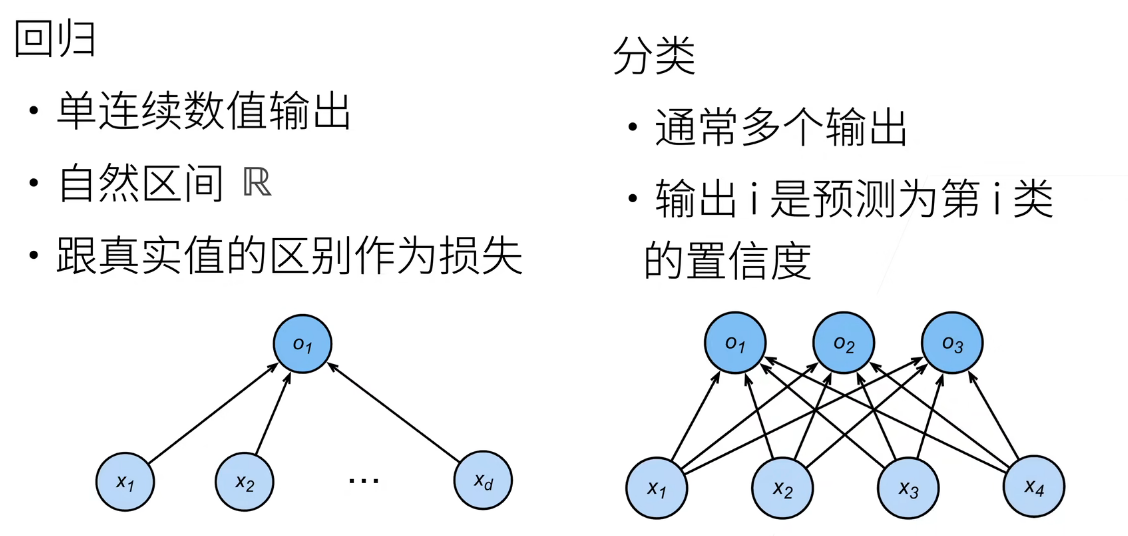
分类要对类别进行一位有效编码

有n种可能的类就输出一个$n$维向量，对向量套softmax
$$\hat{y_i}=softmax(o_i)=\frac{e^{o_i}}{\sum_{k=1}^{n}e^{o_k}}$$
即为输出$\hat{y}$，损失函数使用交叉熵
$$L(y,\hat{y})=-\sum_{i=1}^{n}y_iln\hat{y_i}=-ln\hat{y}_{actual\ label}$$
损失函数对输出$o_i$的偏导如图
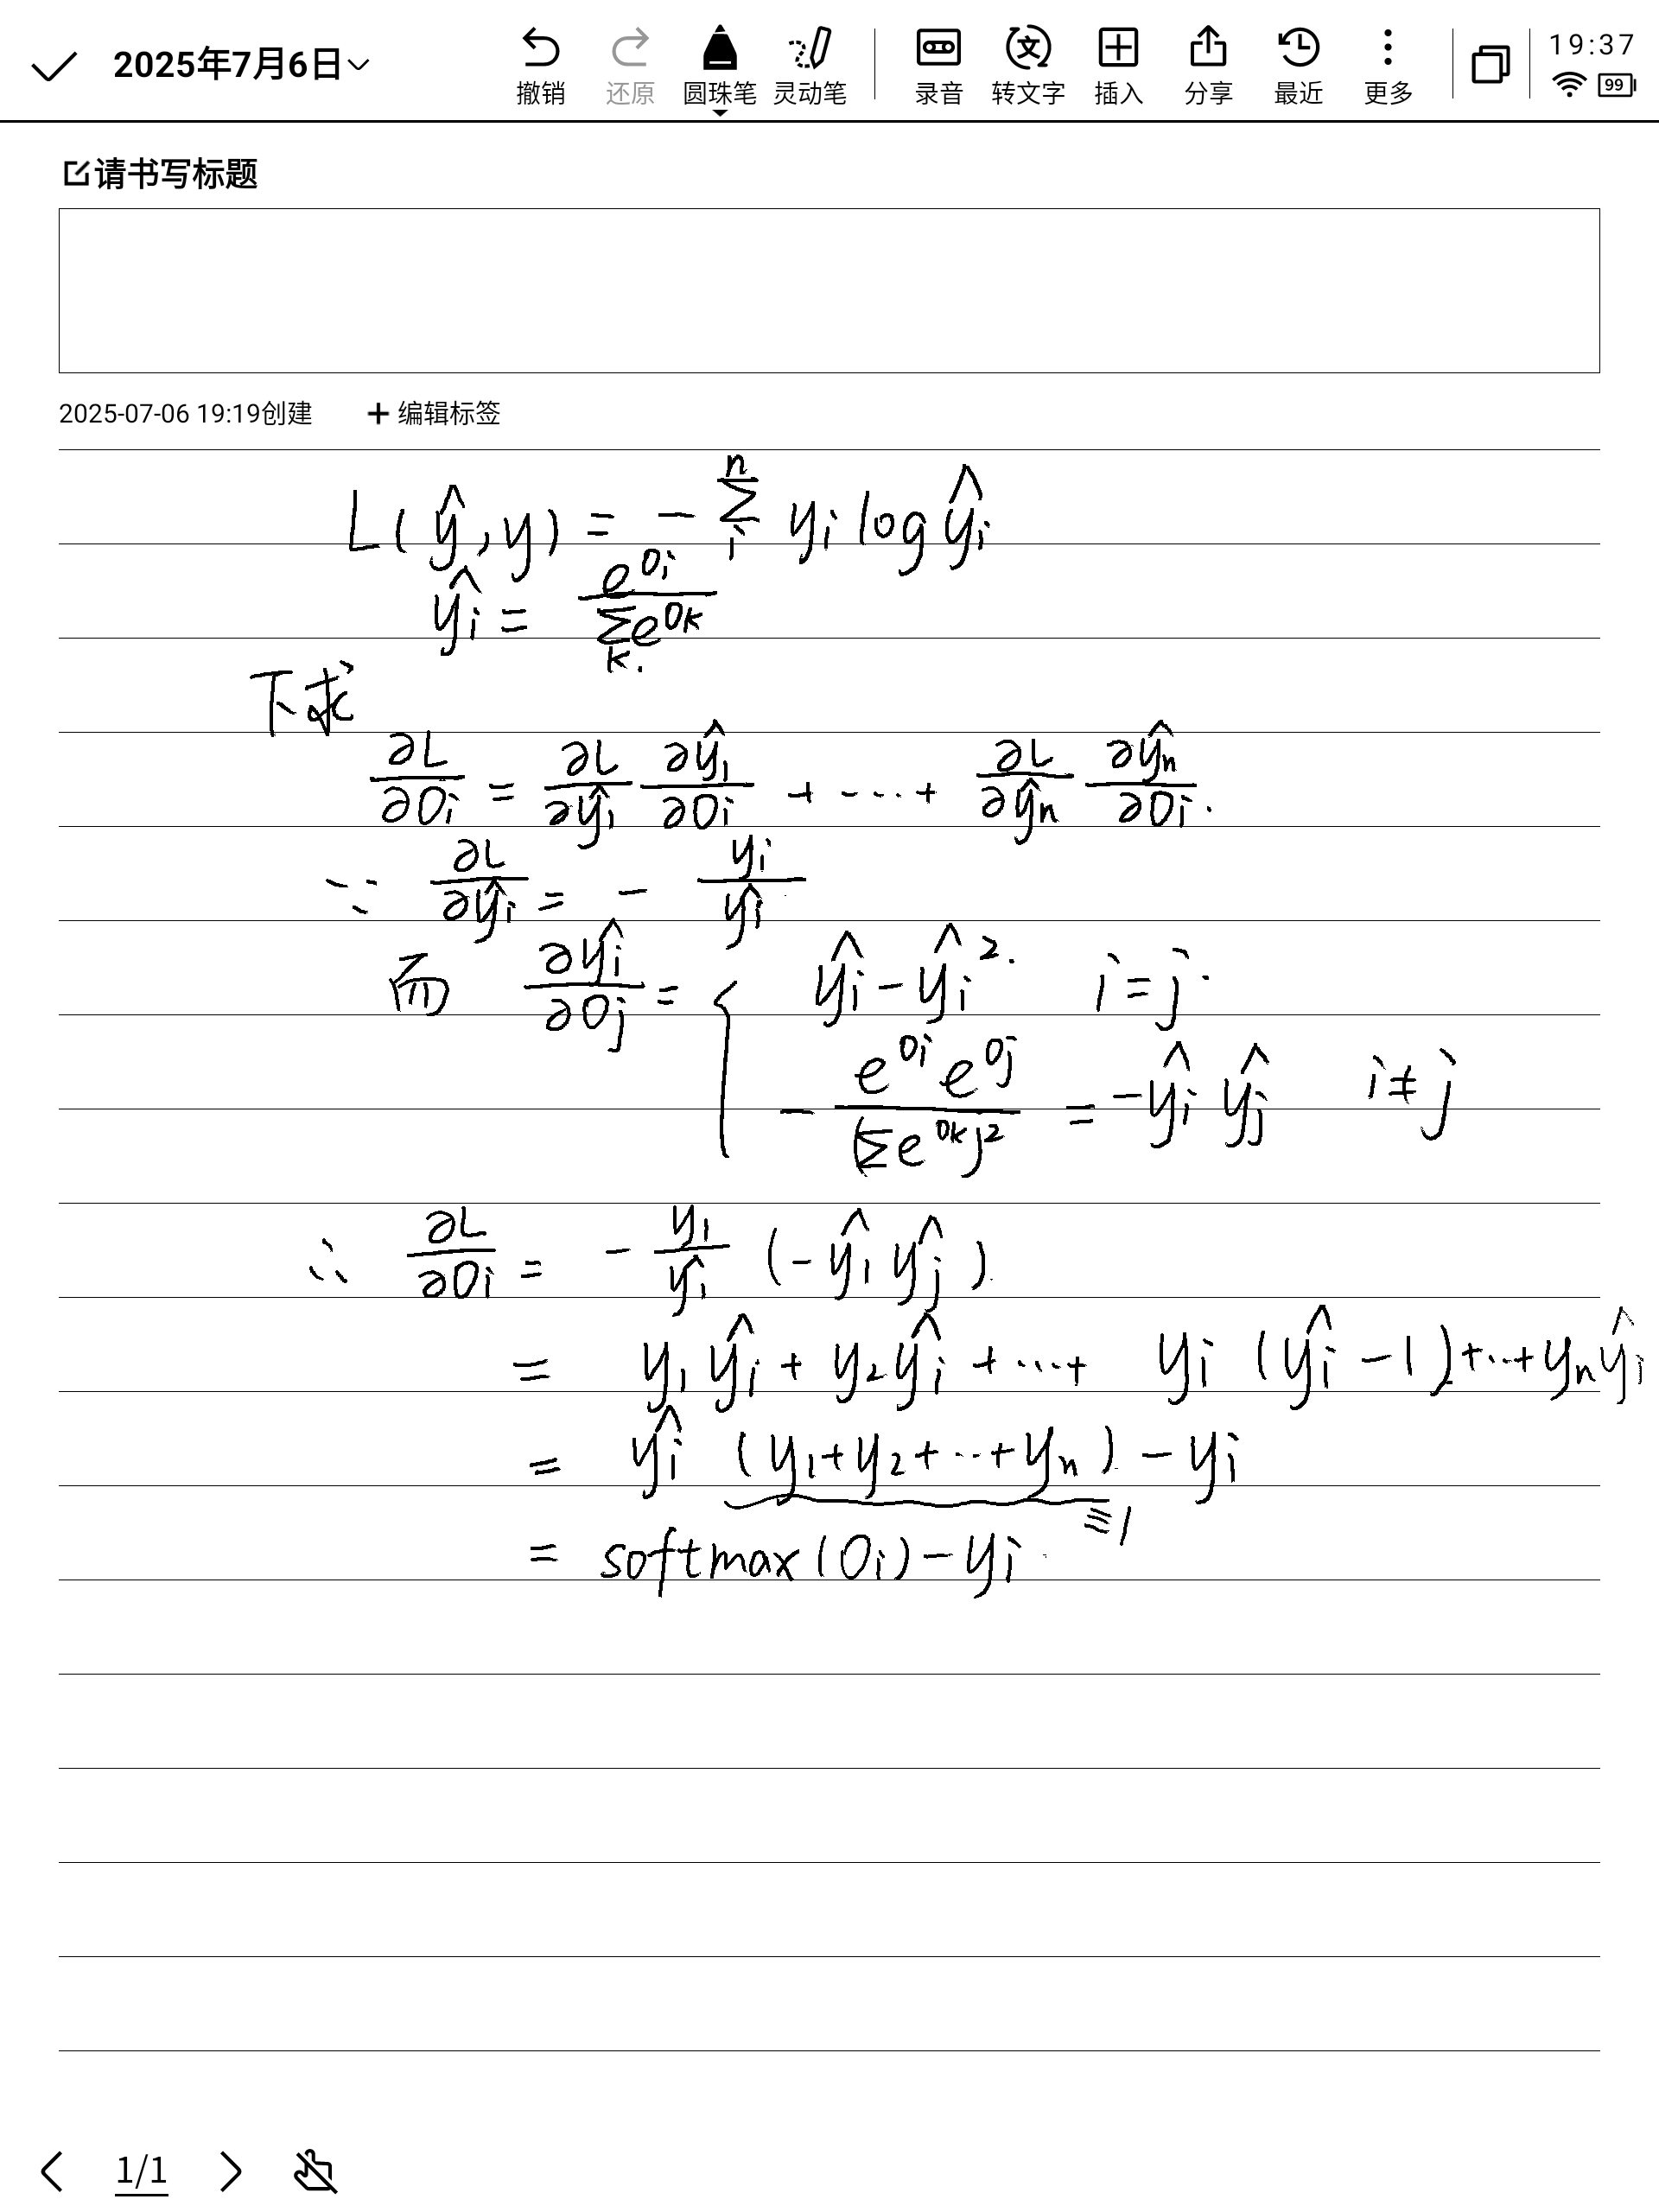


## 读取一个图像分类数据集 
fashion-MNIST

In [2]:
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l
import numpy as np
from torch import nn

d2l.use_svg_display()


In [4]:
#transforms.ToTensor()表示下载时转换为向量而不是单纯的图片
mnist_train=torchvision.datasets.FashionMNIST(
    root='./lmdl_data',train=True,transform=transforms.ToTensor(),download=False)
mnist_test=torchvision.datasets.FashionMNIST(
    root='./lmdl_data',train=False,transform=transforms.ToTensor(),download=False)

In [5]:
mnist_train,mnist_test

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: ./lmdl_data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: ./lmdl_data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [6]:
#mnist_train[0]是第一组数据，是一个（图片，标签）元组,test也是有标签的，相当于验证集
print(mnist_train[0],mnist_train[0][0].shape)#黑白照片
print(mnist_test[0],mnist_train[0][0].shape)#黑白照片

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000

DataLoader的使用：接受训练数据集：（图片，标签）元组，batch_size,shuffle,numworkers，返回一个可迭代对象

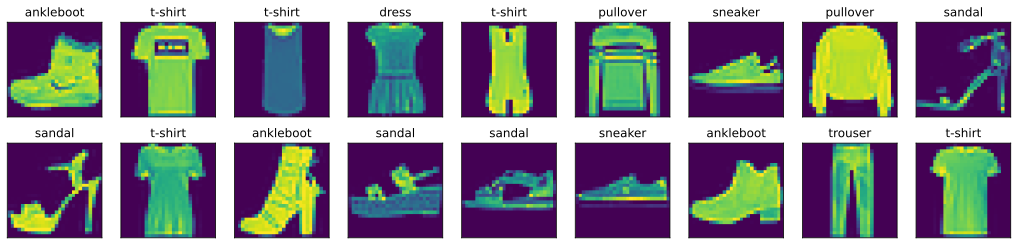

In [7]:
def get_labels(labels):
    text_labels=['t-shirt','trouser','pullover','dress','coat','sandal','shirt',
                 'sneaker','bag','ankleboot']
    return [text_labels[int(i)] for i in labels]

def show_images(imgs,num_rows,num_cols,titles=None,scale=2):
    figsize=(num_cols*scale,num_rows*scale)
    fig,axes=d2l.plt.subplots(num_rows,num_cols,figsize=figsize)
    axes=axes.flatten()
    '''
    zip(axes, imgs): zip 会把 axes 数组和 imgs 列表“拉链”在一起。
    它会生成一个个的元组 (ax, img)
    enumerate(...): enumerate 会在 zip 的基础上，再额外添加一个从0开始的索引 i。
    所以，它生成的元组是 (i, (ax, img))
    '''
    for i,(ax,img) in enumerate(zip(axes,imgs)):
        if torch.is_tensor(img):
            ax.imshow(img.numpy())
        else:
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        ax.set_title(titles[i]) 
X,y=next(iter(data.DataLoader(mnist_train,batch_size=18)))
#X维度(18,1,28,28)这里reshape把1去掉
show_images(X.reshape(18,28,28),2,9,titles=get_labels(y))         

这是看加载数据时num_workers的设置影响

In [9]:
batch_size=256
workers=4
train_iterable=data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=workers)
test_iterable=data.DataLoader(mnist_test,batch_size,shuffle=False,num_workers=workers)
timer=d2l.Timer()
for X,y in train_iterable:
    continue
f'{timer.stop():.2f}秒'

'4.54秒'

## softmax回归的实现

In [23]:
#第一步 加载数据 前面已经完成
#第二步 初始化参数
nums_input=784 #这里直接展平28*28，而不用卷积
nums_output=10 #10个类别
'''
W的维度是（输入*输出），
X遵循一般表格的排放，
b是行向量，y是列向量，
Y_hat是矩阵，每一行是对y预测的softmax后的行向量
'''
W=torch.normal(0,0.01,size=(nums_input,nums_output),requires_grad=True)
b=torch.zeros(nums_output,requires_grad=True)

In [24]:
#第三部 前向传播过程
def softmax(O):
    O_exp=torch.exp(O)
    row_sum=O_exp.sum(1,keepdim=True)
    return O_exp/row_sum #广播机制
def softmax_net(X,W,b):
    O=torch.matmul(X.reshape((-1,W.shape[0])),W)+b
    return softmax(O)

In [25]:
#第四步 损失函数
#高级索引X[list1,list2]它会依次匹配，提取出X[list1[0],list2[0]],X[list1[1],list2[1]]...返回一个行向量，shape:(len(list1),)
def cross_entro(Y_hat,y):
    return -torch.log(Y_hat[range(len(Y_hat)),y])

In [26]:
#第五步 评估
def accuracy(Y_hat,y):
    if len(Y_hat.shape)>1 and Y_hat.shape[1]>1:#有多个类别时
        Y_hat=Y_hat.argmax(axis=1)
    cmp=Y_hat.type(y.dtype)==y
    return float(cmp.type(y.dtype).sum())
def modal_accuracy(net,valid_iter):
    if isinstance(net,torch.nn.Module):
        net.eval()
    correct_num=all_num=0.0
    for X,y in valid_iter:
        correct_num+=accuracy(net(X,W,b),y)
        all_num+=y.numel()#在y为一维张量时两者结果相同，len(y)返回的是第一个维度的长度，numel()返回张量全部元素个数
    return correct_num/all_num    

In [27]:
#创建优化器
#请区别，my_updater=torch.optim.SGD(net.parameters(),lr)这是创建了一个优化器对象，它才有zero_grad,step这些方法
#现在这个是一个函数，执行的就是sgd随机梯度下降的内容
my_updater = lambda batch_size: d2l.sgd([W, b], lr, batch_size)

In [28]:
def train_1epoch(net,train_iter,loss,updater,W,b):
    if isinstance(net,torch.nn.Module):
        net.train()
    loss_sum=correct_num=all_num=0.0
    for X,y in train_iter:
        Y_hat=net(X,W,b)
        l=loss(Y_hat,y)
        if isinstance(updater,torch.optim.Optimizer):
            updater.zero_grad()
            l.sum().backward()
            updater.step()
        else:
            l.sum().backward()
            updater(X.shape[0])#这一步执行 d2l.sgd 函数
        loss_sum+=l.sum()
        correct_num+=accuracy(Y_hat,y)
        all_num+=y.numel()
    return loss_sum/all_num,correct_num/all_num
def train(num_epochs,net,train_iter,valid_iter,loss,updater,W,b):
    for epoch in range(num_epochs):
        train_loss,train_acc=train_1epoch(net,train_iter,loss,updater,W,b)
        valid_acc=modal_accuracy(net,valid_iter)
        print(f"第{epoch+1}轮训练，损失{train_loss:.4f}，训练准确率{train_acc:.4f}，验证准确率{valid_acc:.4f}")

In [29]:
num_epochs=10
lr=0.1
batch_size=256
#my_updater=d2l.sgd([W,b],lr,batch_size)
#print(isinstance(my_updater,torch.optim.Optimizer))
train(num_epochs,softmax_net,train_iterable,test_iterable,cross_entro,my_updater,W,b)

第1轮训练，损失0.7879，训练准确率0.7481，验证准确率0.7868
第2轮训练，损失0.5707，训练准确率0.8133，验证准确率0.8079
第3轮训练，损失0.5244，训练准确率0.8257，验证准确率0.8030
第4轮训练，损失0.5012，训练准确率0.8319，验证准确率0.8041
第5轮训练，损失0.4856，训练准确率0.8365，验证准确率0.8271
第6轮训练，损失0.4736，训练准确率0.8407，验证准确率0.8282
第7轮训练，损失0.4650，训练准确率0.8425，验证准确率0.8254
第8轮训练，损失0.4577，训练准确率0.8451，验证准确率0.8303
第9轮训练，损失0.4524，训练准确率0.8463，验证准确率0.8333
第10轮训练，损失0.4476，训练准确率0.8481，验证准确率0.8308


## 快速实现

In [20]:
#加载数据，前面已经完成
#前向传播过程
net=nn.Sequential(nn.Flatten(),nn.Linear(784,10))
#初始化参数
#注意这两步不要反了！
def init_weights(m):
    if type(m)==nn.Linear:
        nn.init.normal_(m.weight,std=0.01)
net.apply(init_weights)
#损失函数
#注意，交叉熵已经自动包含了softmax过程！！所以我把Y_hat改成了O
loss=nn.CrossEntropyLoss()
#优化器
updater=torch.optim.SGD(net.parameters(),lr=0.1)
#评估
def accuracy(O,y):
    if len(O.shape)>1 and O.shape[1]>1:#有多个类别时
        O=O.argmax(axis=1)
    cmp=O.type(y.dtype)==y
    return float(cmp.type(y.dtype).sum())
def modal_accuracy(net,valid_iter):
    if isinstance(net,torch.nn.Module):
        net.eval()
    correct_num=all_num=0.0
    for X,y in valid_iter:
        correct_num+=accuracy(net(X),y)
        all_num+=y.numel()#在y为一维张量时两者结果相同，len(y)返回的是第一个维度的长度，numel()返回张量全部元素个数
    return correct_num/all_num  

def train_1epoch(net,train_iter,loss,updater):
    if isinstance(net,torch.nn.Module):
        net.train()
    loss_sum=correct_num=all_num=0.0
    for X,y in train_iter:
        O=net(X)
        l=loss(O,y)
        if isinstance(updater,torch.optim.Optimizer):
            updater.zero_grad()
            l.sum().backward()
            updater.step()
        else:
            l.sum().backward()
            updater(X.shape[0])#这一步执行 d2l.sgd 函数
        loss_sum+=l.sum()
        correct_num+=accuracy(O,y)#这里实际上用的是O而不是Y_hat，因为Y_hat计算放在损失函数里了。但是这不影响准确率的计算
        all_num+=y.numel()
    return loss_sum/all_num,correct_num/all_num
def train(num_epochs,net,train_iter,valid_iter,loss,updater):
    for epoch in range(num_epochs):
        train_loss,train_acc=train_1epoch(net,train_iter,loss,updater)
        valid_acc=modal_accuracy(net,valid_iter)
        print(f"第{epoch+1}轮训练，损失{train_loss:.4f}，训练准确率{train_acc:.4f}，验证准确率{valid_acc:.4f}")

num_epochs=10

train(num_epochs,net,train_iterable,test_iterable,loss,updater)

第1轮训练，损失0.0031，训练准确率0.7530，验证准确率0.7905
第2轮训练，损失0.0022，训练准确率0.8139，验证准确率0.8064
第3轮训练，损失0.0021，训练准确率0.8260，验证准确率0.8116
第4轮训练，损失0.0020，训练准确率0.8328，验证准确率0.8235
第5轮训练，损失0.0019，训练准确率0.8368，验证准确率0.8232
第6轮训练，损失0.0019，训练准确率0.8391，验证准确率0.8280
第7轮训练，损失0.0018，训练准确率0.8433，验证准确率0.8299
第8轮训练，损失0.0018，训练准确率0.8439，验证准确率0.8293
第9轮训练，损失0.0018，训练准确率0.8468，验证准确率0.8258
第10轮训练，损失0.0018，训练准确率0.8477，验证准确率0.8328
